In [1]:
import numpy as np

In [2]:
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

In [3]:
df

,Points,Rank,Team,Year
0,876,1,Riders,2014
1,789,2,Riders,2015
2,863,2,Devils,2014
3,673,3,Devils,2015
4,741,3,Kings,2014
5,812,4,kings,2015
6,756,1,Kings,2016
7,788,1,Kings,2017
8,694,2,Riders,2016
9,701,4,Royals,2014


In [4]:
df.groupby('Team').groups

{'Devils': Int64Index([2, 3], dtype='int64'),
 'Kings': Int64Index([4, 6, 7], dtype='int64'),
 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Royals': Int64Index([9, 10], dtype='int64'),
 'kings': Int64Index([5], dtype='int64')}

In [5]:
df.groupby(['Team','Year']).groups

{('Devils', 2014): Int64Index([2], dtype='int64'),
 ('Devils', 2015): Int64Index([3], dtype='int64'),
 ('Kings', 2014): Int64Index([4], dtype='int64'),
 ('Kings', 2016): Int64Index([6], dtype='int64'),
 ('Kings', 2017): Int64Index([7], dtype='int64'),
 ('Riders', 2014): Int64Index([0], dtype='int64'),
 ('Riders', 2015): Int64Index([1], dtype='int64'),
 ('Riders', 2016): Int64Index([8], dtype='int64'),
 ('Riders', 2017): Int64Index([11], dtype='int64'),
 ('Royals', 2014): Int64Index([9], dtype='int64'),
 ('Royals', 2015): Int64Index([10], dtype='int64'),
 ('kings', 2015): Int64Index([5], dtype='int64')}

In [9]:
grouped = df.groupby('Year')

for name,group in grouped:
    print(name)
    print(':')
    print(group)
    print('-----------')

2014
:
   Points  Rank    Team  Year
0     876     1  Riders  2014
2     863     2  Devils  2014
4     741     3   Kings  2014
9     701     4  Royals  2014
-----------
2015
:
    Points  Rank    Team  Year
1      789     2  Riders  2015
3      673     3  Devils  2015
5      812     4   kings  2015
10     804     1  Royals  2015
-----------
2016
:
   Points  Rank    Team  Year
6     756     1   Kings  2016
8     694     2  Riders  2016
-----------
2017
:
    Points  Rank    Team  Year
7      788     1   Kings  2017
11     690     2  Riders  2017
-----------


In [17]:
df.groupby(['Team'])['Points'].agg(np.mean)

Team
Devils    768.000000
Kings     761.666667
Riders    762.250000
Royals    752.500000
kings     812.000000
Name: Points, dtype: float64

In [18]:
df.groupby(['Team'])['Points'].count()

Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
Name: Points, dtype: int64

In [7]:
df.groupby(['Team'])['Year'].unique()

Team
Devils                [2014, 2015]
Kings           [2014, 2016, 2017]
Riders    [2014, 2015, 2016, 2017]
Royals                [2014, 2015]
kings                       [2015]
Name: Year, dtype: object

In [8]:
df.groupby(['Team'])['Year'].nunique()

Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
Name: Year, dtype: int64

In [9]:
df.groupby(['Team'])['Year'].nunique().reset_index()

,Team,Year
0,Devils,2
1,Kings,3
2,Riders,4
3,Royals,2
4,kings,1


In [10]:
df.groupby(['Team'])['Year'].nunique().reset_index().rename(columns={'Year':'year_nuique'})

,Team,year_nuique
0,Devils,2
1,Kings,3
2,Riders,4
3,Royals,2
4,kings,1


In [16]:
df.groupby(['Team','Year']).size().rename('agg1')

Team    Year
Devils  2014    1
        2015    1
Kings   2014    1
        2016    1
        2017    1
Riders  2014    1
        2015    1
        2016    1
        2017    1
Royals  2014    1
        2015    1
kings   2015    1
Name: agg1, dtype: int64

In [17]:
df.groupby(['Team','Year']).size().rename('agg1').to_frame()

agg1
Team   Year      
Devils 2014     1
       2015     1
Kings  2014     1
       2016     1
       2017     1
Riders 2014     1
       2015     1
       2016     1
       2017     1
Royals 2014     1
       2015     1
kings  2015     1

In [18]:
df.groupby(['Team','Year']).size().rename('agg1').to_frame().reset_index()

,Team,Year,agg1
0,Devils,2014,1
1,Devils,2015,1
2,Kings,2014,1
3,Kings,2016,1
4,Kings,2017,1
5,Riders,2014,1
6,Riders,2015,1
7,Riders,2016,1
8,Riders,2017,1
9,Royals,2014,1


In [28]:
df.groupby(['Team'])['Points'].unique()

Team
Devils              [863, 673]
Kings          [741, 756, 788]
Riders    [876, 789, 694, 690]
Royals              [701, 804]
kings                    [812]
Name: Points, dtype: object

In [24]:
df.groupby(['Team'])['Points'].var()

Team
Devils    18050.000000
Kings       576.333333
Riders     7844.250000
Royals     5304.500000
kings              NaN
Name: Points, dtype: float64

In [20]:
df.groupby(['Team','Year'])['Year'].groups

{('Devils', 2014): Int64Index([2], dtype='int64'),
 ('Devils', 2015): Int64Index([3], dtype='int64'),
 ('Kings', 2014): Int64Index([4], dtype='int64'),
 ('Kings', 2016): Int64Index([6], dtype='int64'),
 ('Kings', 2017): Int64Index([7], dtype='int64'),
 ('Riders', 2014): Int64Index([0], dtype='int64'),
 ('Riders', 2015): Int64Index([1], dtype='int64'),
 ('Riders', 2016): Int64Index([8], dtype='int64'),
 ('Riders', 2017): Int64Index([11], dtype='int64'),
 ('Royals', 2014): Int64Index([9], dtype='int64'),
 ('Royals', 2015): Int64Index([10], dtype='int64'),
 ('kings', 2015): Int64Index([5], dtype='int64')}

In [21]:
df

,Points,Rank,Team,Year
0,876,1,Riders,2014
1,789,2,Riders,2015
2,863,2,Devils,2014
3,673,3,Devils,2015
4,741,3,Kings,2014
5,812,4,kings,2015
6,756,1,Kings,2016
7,788,1,Kings,2017
8,694,2,Riders,2016
9,701,4,Royals,2014


In [28]:
df.groupby(['Year'])['Team'].cumcount()

0     0
1     0
2     1
3     1
4     2
5     2
6     0
7     0
8     1
9     3
10    3
11    1
dtype: int64

In [26]:
df.groupby(['Year']).groups

{2014: Int64Index([0, 2, 4, 9], dtype='int64'),
 2015: Int64Index([1, 3, 5, 10], dtype='int64'),
 2016: Int64Index([6, 8], dtype='int64'),
 2017: Int64Index([7, 11], dtype='int64')}

In [27]:
df

,Points,Rank,Team,Year
0,876,1,Riders,2014
1,789,2,Riders,2015
2,863,2,Devils,2014
3,673,3,Devils,2015
4,741,3,Kings,2014
5,812,4,kings,2015
6,756,1,Kings,2016
7,788,1,Kings,2017
8,694,2,Riders,2016
9,701,4,Royals,2014


In [25]:
df.groupby(['Year']).count()

Year
2014    4
2015    4
2016    2
2017    2
Name: Points, dtype: int64

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pytz
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
train_ori = pd.read_csv(path+'train.csv', dtype=dtypes, usecols=['ip', 'is_attributed', 'click_time'], nrows=nrows)

In [3]:
tr_s = 6000000
te_s = 2000000
nrows=None

dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32'
        }

path = '/home/kai/data/kaggle/talkingdata/data/'

tr = pd.read_csv(path+'train.csv', dtype=dtypes, usecols=['ip', 'is_attributed', 'click_time'], nrows=nrows).sample(tr_s)
gc.collect()
te = pd.read_csv(path+'test_supplement.csv', dtype=dtypes, usecols=['ip', 'click_time'], nrows=nrows).sample(te_s)
all_df = tr.append(te)
gc.collect()

0

In [4]:
cst = pytz.timezone('Asia/Shanghai')
all_df['click_time'] = pd.to_datetime(all_df['click_time']).dt.tz_localize(pytz.utc).dt.tz_convert(cst)
all_df['day'] = all_df.click_time.dt.day.astype('uint8')


all_df['day7'] = all_df.day == 7 # 1'st day
all_df['day8'] = all_df.day == 8 # 2'nd day
all_df['day9'] = all_df.day == 9 # 3'rd day
all_df['day_test'] = all_df.day == 10 # 4'th day(test)|

In [21]:
all_df['day6'] = all_df.day == 6

In [22]:
all_df.shape

(8000000, 9)

In [23]:
all_df.head()

,click_time,ip,is_attributed,day,day7,day8,day9,day_test,day6
29468678,2017-11-07 14:00:59+08:00,203176,0.0,7,True,False,False,False,False
105926998,2017-11-08 19:24:55+08:00,214826,0.0,8,False,True,False,False,False
112637827,2017-11-08 21:19:48+08:00,48418,0.0,8,False,True,False,False,False
22417869,2017-11-07 11:57:49+08:00,68681,0.0,7,True,False,False,False,False
117925650,2017-11-08 22:46:36+08:00,102027,0.0,8,False,True,False,False,False


In [28]:
len(all_df[(all_df['day6']==True)])

15

In [69]:
df_inday7 = all_df[['ip','day7']].groupby('ip')['day7'].sum().to_frame().reset_index() 
df_inday7.shape

(165970, 2)

In [71]:
df_inday8 = all_df[['ip','day8']].groupby('ip')['day8'].sum().to_frame().reset_index() 
df_inday8.shape

(165970, 2)

In [72]:
df_inday9 = all_df[['ip','day9']].groupby('ip')['day9'].sum().to_frame().reset_index() 
df_inday9.shape

(165970, 2)

In [73]:
df_inday10 = all_df[['ip','day_test']].groupby('ip')['day_test'].sum().to_frame().reset_index() 
df_inday10.shape

(165970, 2)

In [80]:
da1 = da1.merge(df_inday10, on='ip')

In [81]:
da1.shape

(165970, 5)

In [82]:
da1.head()

,ip,day7,day8,day9,day_test
0,2,0.0,0.0,0.0,1.0
1,3,0.0,0.0,0.0,6.0
2,4,0.0,0.0,0.0,1.0
3,5,0.0,0.0,0.0,4.0
4,6,0.0,24.0,22.0,28.0


In [98]:
 da1[(da1['day7'] != 0) & (da1['day8'] != 0)].shape

(27752, 5)

In [100]:
inday7notday8 = da1[(da1['day7'] != 0) & (da1['day8'] == 0)]
len(inday7notday8) / len(da1)

0.2325360004820148

In [101]:
inday8notday9 = da1[(da1['day8'] != 0) & (da1['day9'] == 0)]
len(inday8notday9) / len(da1)

0.224871964812918

In [102]:
inday9notday10 = da1[(da1['day9'] != 0) & (da1['day_test'] == 0)]
len(inday9notday10) / len(da1)

0.2359161294209797

## Higher CVR rate: inday10notday9

In [103]:
inday10notday9 = da1[(da1['day_test'] != 0) & (da1['day9'] == 0)]
len(inday10notday9) / len(da1)

0.2703560884497198

In [104]:
inday9notday8 = da1[(da1['day9'] != 0) & (da1['day8'] == 0)]
len(inday9notday8) / len(da1)

0.23634391757546544

In [105]:
inday8notday7 = da1[(da1['day8'] != 0) & (da1['day7'] == 0)]
len(inday8notday7) / len(da1)

0.20821835271434597

In [108]:
inday10NotInOtherDays = da1[(da1['day_test'] != 0) & (da1['day7'] == 0) & (da1['day8'] == 0) & (da1['day9'] == 0)]
len(inday10NotInOtherDays) / len(da1)

0.19918057480267518

In [110]:
inAllDays = da1[(da1['day_test'] != 0) & (da1['day7'] != 0) & (da1['day8'] != 0) & (da1['day9'] != 0)]
len(inAllDays) / len(da1)

0.09158281617159728

In [86]:
da2.shape

(38594, 5)

In [93]:
da3 = da2[da2['day_test']==0]

In [94]:
da3.shape

(30874, 5)

In [95]:
da3.head()

,ip,day7,day8,day9,day_test
355,624,2.0,0.0,0.0,0.0
471,810,1.0,0.0,0.0,0.0
898,1572,1.0,0.0,0.0,0.0
2256,4024,1.0,0.0,0.0,0.0
2756,4885,2.0,0.0,2.0,0.0


In [90]:
da2.tail(100)

,ip,day7,day8,day9,day_test
109641,212536,2.0,0.0,0.0,0.0
109642,212540,1.0,0.0,0.0,0.0
109643,212541,1.0,0.0,0.0,0.0
109644,212542,1.0,0.0,0.0,0.0
109645,212546,3.0,0.0,0.0,0.0
109646,212549,1.0,0.0,0.0,0.0
109647,212551,1.0,0.0,0.0,0.0
109648,212554,1.0,0.0,0.0,0.0
109649,212557,6.0,0.0,0.0,0.0
109650,212559,9.0,0.0,0.0,0.0


In [32]:
df_s = all_df.sample(frac=0.01)

In [33]:
df_s[['ip','day_test']].groupby('ip')['day_test'].sum().to_frame().reset_index()

,ip,day_test
0,6,2.0
1,9,1.0
2,19,0.0
3,20,1.0
4,27,1.0
5,31,0.0
6,33,0.0
7,36,2.0
8,45,0.0
9,59,0.0


In [62]:
def print_count(df, tgt, boo):
#     import pdb
#     pdb.set_trace()
    df = df[['ip', tgt]].groupby('ip')[tgt].sum().to_frame().reset_index()
    df[tgt+'_count'] = df[tgt].rolling(window=3000).sum()
    if boo:
        plt.figure(figsize=(20,10))
    plt.plot(df.ip, df[tgt+'_count'])

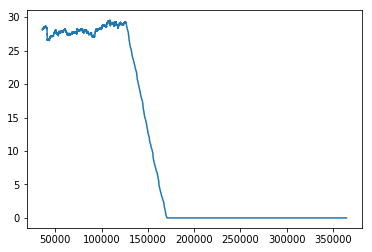

In [35]:
print_count(all_df,'day_test')


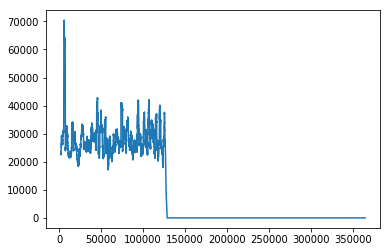

In [48]:
print_count(all_df,'day_test')


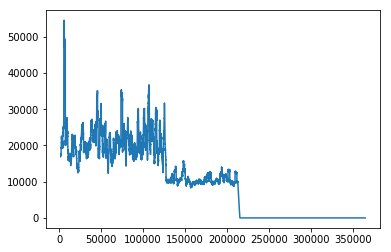

In [49]:
print_count(all_df,'day7')

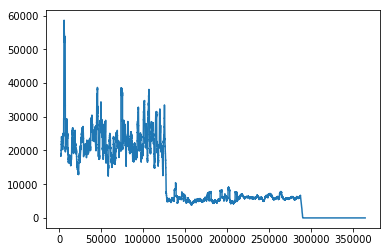

In [50]:
print_count(all_df,'day8')

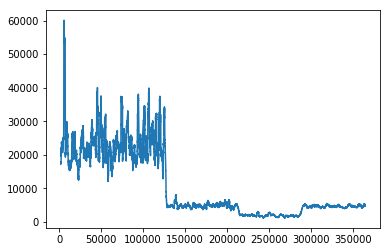

In [51]:
print_count(all_df,'day9')

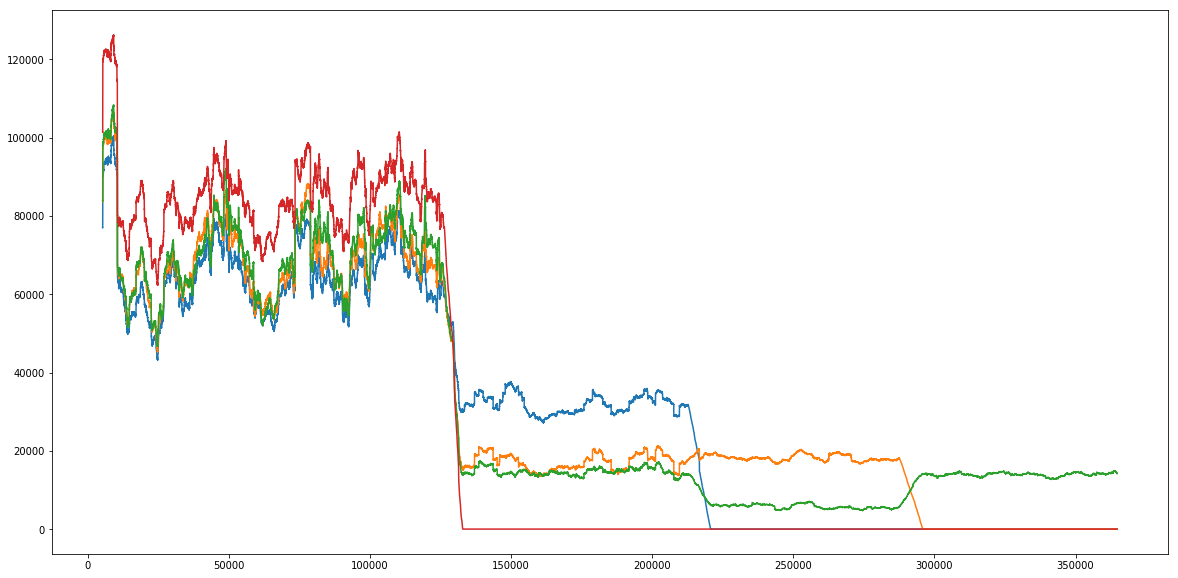

In [63]:
print_count(all_df,'day7', True)
print_count(all_df,'day8', False)
print_count(all_df,'day9', False)
print_count(all_df,'day_test', False)

In [58]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

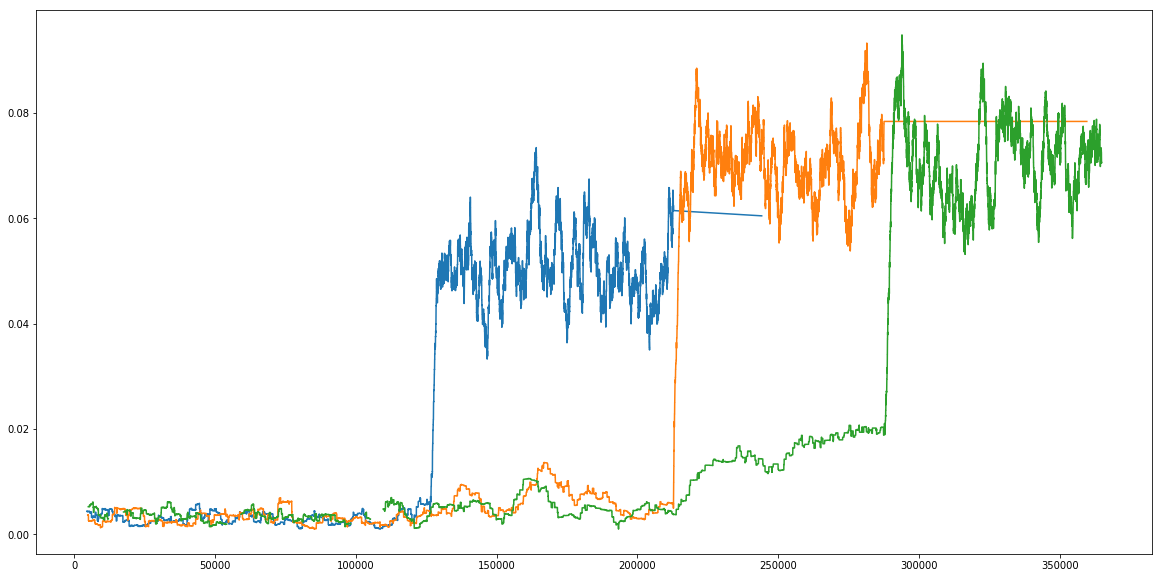

In [64]:
def print_attr(df):
    df = df[['ip', 'is_attributed']].groupby('ip').is_attributed.mean().to_frame().reset_index()
    df['roll'] = df.is_attributed.rolling(window=1000).mean()
    plt.plot(df.ip, df.roll)

plt.figure(figsize=(20,10))
print_attr(all_df[all_df.day == 7]) # blue
print_attr(all_df[all_df.day == 8]) # yellow
print_attr(all_df[all_df.day == 9]) # green

In [118]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_enc = OneHotEncoder()
label_encoder = LabelEncoder()

In [119]:
values = [111,83,123]

In [123]:
da1.shape

(165970, 5)

In [129]:
da1['ipstr'] = da1['ip'].apply(str)

In [130]:
da1.head()

,ip,day7,day8,day9,day_test,ipstr
0,2,0.0,0.0,0.0,1.0,2
1,3,0.0,0.0,0.0,6.0,3
2,4,0.0,0.0,0.0,1.0,4
3,5,0.0,0.0,0.0,4.0,5
4,6,0.0,24.0,22.0,28.0,6


In [131]:
da1.ipstr

0              2
1              3
2              4
3              5
4              6
5              9
6             10
7             11
8             12
9             13
10            19
11            20
12            21
13            25
14            26
15            27
16            29
17            30
18            31
19            32
20            33
21            35
22            36
23            39
24            42
25            45
26            46
27            48
28            49
29            52
           ...  
165940    364692
165941    364705
165942    364708
165943    364709
165944    364712
165945    364713
165946    364719
165947    364720
165948    364721
165949    364726
165950    364727
165951    364730
165952    364731
165953    364733
165954    364740
165955    364741
165956    364744
165957    364748
165958    364751
165959    364753
165960    364757
165961    364758
165962    364759
165963    364761
165964    364764
165965    364773
165966    364774
165967    3647

In [132]:
label_encoder.fit_transform(list(da1.ipstr))

array([ 54100,  98778, 128560, ..., 126389, 126390, 126391])

In [142]:
label_encoder.fit_transform(['111','833','123','423'])

array([0, 3, 1, 2])

In [179]:
label_encoder.transform(['833'])

array([4])

In [175]:
label_encoder.classes_

array(['423', '833', '111', '123'],
      dtype='<U3')

In [174]:
np.random.shuffle(label_encoder.classes_)

In [114]:
enc.n_values_

array([124])

In [115]:
enc.feature_indices_

array([  0, 124])

In [188]:
list1 = list(range(400000))
np.random.shuffle(list1)

ipdict = dict(zip(list1, range(len(list1))))

In [191]:
list(ipdict.items())[:10]

[(191871, 0),
 (143130, 1),
 (42017, 2),
 (366336, 3),
 (317216, 4),
 (346386, 5),
 (180556, 6),
 (121757, 7),
 (220349, 8),
 (273361, 9)]

In [192]:
da1['newip'] = da1['ip'].apply(lambda x: ipdict[x])

In [193]:
da1.head()

,ip,day7,day8,day9,day_test,ipstr,newip
0,2,0.0,0.0,0.0,1.0,2,375085
1,3,0.0,0.0,0.0,6.0,3,154835
2,4,0.0,0.0,0.0,1.0,4,315762
3,5,0.0,0.0,0.0,4.0,5,203871
4,6,0.0,24.0,22.0,28.0,6,203596


In [196]:
da1ind = da1.reset_index()

In [200]:
da1ind.head()

,index,ip,day7,day8,day9,day_test,ipstr,newip
0,0,2,0.0,0.0,0.0,1.0,2,375085
1,1,3,0.0,0.0,0.0,6.0,3,154835
2,2,4,0.0,0.0,0.0,1.0,4,315762
3,3,5,0.0,0.0,0.0,4.0,5,203871
4,4,6,0.0,24.0,22.0,28.0,6,203596


In [199]:
da1ind.drop('index', axis=1).head()

,ip,day7,day8,day9,day_test,ipstr,newip
0,2,0.0,0.0,0.0,1.0,2,375085
1,3,0.0,0.0,0.0,6.0,3,154835
2,4,0.0,0.0,0.0,1.0,4,315762
3,5,0.0,0.0,0.0,4.0,5,203871
4,6,0.0,24.0,22.0,28.0,6,203596


In [205]:
da1ind['intrain'] = da1ind['index'].apply(lambda x: True if x<3 else False)

In [206]:
da1ind.head()

,index,ip,day7,day8,day9,day_test,ipstr,newip,intrain
0,0,2,0.0,0.0,0.0,1.0,2,375085,True
1,1,3,0.0,0.0,0.0,6.0,3,154835,True
2,2,4,0.0,0.0,0.0,1.0,4,315762,True
3,3,5,0.0,0.0,0.0,4.0,5,203871,False
4,4,6,0.0,24.0,22.0,28.0,6,203596,False


In [207]:
da1ind[:3]

,index,ip,day7,day8,day9,day_test,ipstr,newip,intrain
0,0,2,0.0,0.0,0.0,1.0,2,375085,True
1,1,3,0.0,0.0,0.0,6.0,3,154835,True
2,2,4,0.0,0.0,0.0,1.0,4,315762,True
